<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

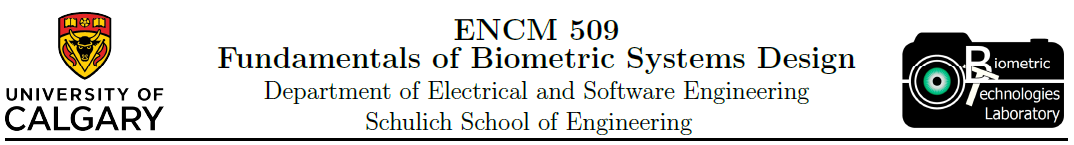

#### Email: brian.kramer@ucalgary.ca 30069935, hoang.truong1@ucalgary.ca 30064426, jacob.lansang1@ucalgary.ca 30078981


### Introduction
The objective of this lab 2 was to acquire proficiency in signature data acquisition and statistical analysis, prior to signature verification or recognition tasks. We employed the Wacom Bamboo Fun Signature Pad and its driver and SigGet software to record 30 examples each of true and imposter signatures. We also gathered 30 samples of a written word for comparison. Through this lab, we were able to gain hands-on experience with data acquisition methods and statistical analysis, which will serve as a strong foundation for further research and studies in the field of biometric authentication and identification.

### Importing packages and initial set up:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

##### Graphical representation of a random sample of data with a mean of 50, std of 5, 80 samples, and 10 bins:

In [3]:
# Theoretical Mean and Std
mu = 50
std = 5
qtt_samples = 80 # 80 samples

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([57.45206544, 54.74527737, 43.7059017 , 48.25090208, 44.69141091,
       45.45206786, 54.90277086, 48.25410537, 59.14000565, 49.47811334,
       54.27704546, 50.95828082, 47.49471493, 47.645128  , 51.60887523,
       51.93316517, 49.89889349, 49.57944723, 46.17580839, 50.93097343,
       45.82508218, 47.84497624, 45.3870741 , 65.16636023, 48.49024238,
       52.90325105, 44.88108638, 51.43978613, 50.01331249, 54.67370384,
       43.39854338, 49.47570491, 46.60961641, 45.95353952, 45.02714419,
       50.63223688, 48.52694971, 48.31689902, 43.98078822, 51.75171194,
       52.02487706, 53.13027639, 54.71159948, 51.32932906, 53.40034544,
       45.49291586, 46.16271754, 51.48625401, 52.63014206, 49.62992079,
       57.20285124, 48.30746323, 54.1548288 , 50.17161692, 49.03643975,
       46.24922481, 50.44054312, 50.19118243, 49.66804436, 40.20206261,
       48.58335949, 54.18088061, 53.48803281, 51.48519491, 52.42113183,
       54.9753882 , 51.45098579, 46.44449466, 55.2278988 , 42.73

REAL mean: 49.74; std: 4.17


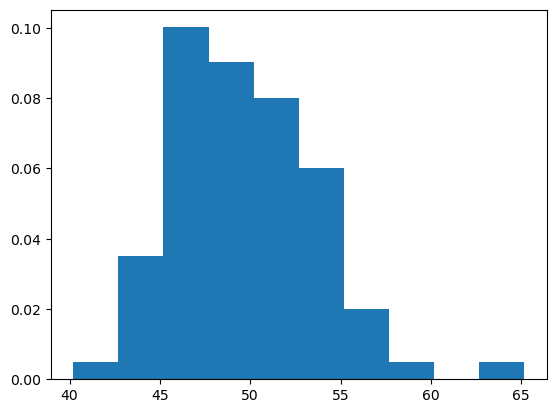

In [4]:
plt.hist(pop_norm, bins=10, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

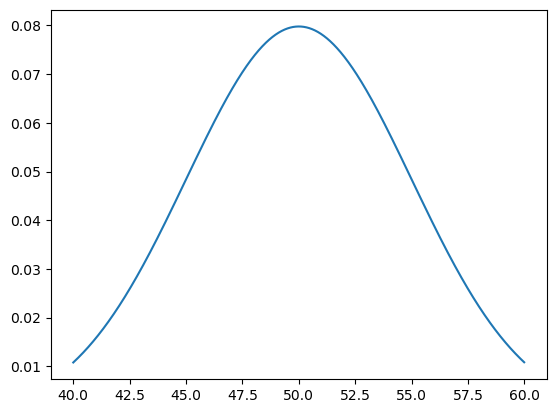

In [5]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

##### Graphical representation of a random sample of data with a mean of 50, std of 5, 1000 samples, and 100 bins:

In [6]:
# Theoretical Mean and Std
mu = 50
std = 5
qtt_samples = 1000 # 1000 samples

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([41.55186082, 50.87125186, 51.99397352, 48.00874406, 47.87436987,
       53.87902829, 51.87406342, 48.80772247, 51.89606747, 39.15424206,
       55.63361788, 49.11390015, 47.01542351, 42.94800944, 42.34016496,
       49.49203799, 48.71428393, 51.94278922, 48.46535889, 53.64716274,
       47.07998507, 47.96037148, 48.15259036, 48.25429152, 49.78209289,
       48.22493167, 53.8746679 , 45.35735313, 53.37387756, 56.57415167,
       55.18088276, 49.65884247, 48.54496324, 40.12289904, 47.54285457,
       52.97044924, 42.65142313, 53.88141708, 62.50354964, 57.80990982,
       60.60703247, 50.62879126, 51.36680955, 49.46371315, 43.70101674,
       47.28338254, 60.37617884, 52.37267845, 49.33291187, 48.5575457 ,
       53.2864888 , 56.54602655, 43.59150029, 40.97228907, 51.51539564,
       42.11358999, 55.49652866, 51.16616075, 46.89352454, 49.32167634,
       51.88727862, 57.18865374, 44.59540042, 58.71955375, 53.68702346,
       52.41221821, 46.34072187, 54.18474207, 51.82486685, 54.84

REAL mean: 50.16; std: 5.04


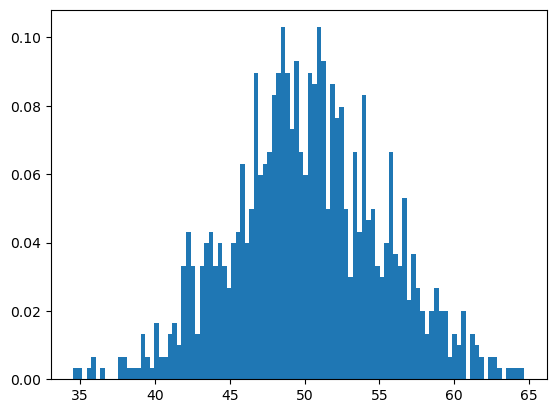

In [7]:
plt.hist(pop_norm, bins=100, density=True); # Want 100 bins for histogram
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

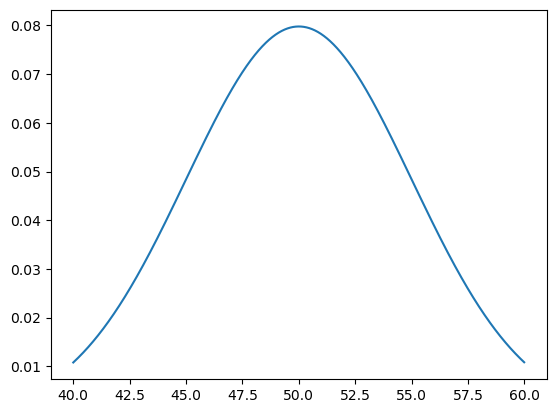

In [8]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

#### As we can see when comparing the histogram of each data set, the first data set with 80 samples and 10 bins show a lot less detail as there are less bins and less samples, which makes it harder to see how data is spread. Compared to the first histogram, the second histogram is better at showing data spread as there are many more samples and a lot more bins, and the histogram is able to show data in smaller intervals. This makes it much easier to see how data is distributed in the data set.

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

In [9]:
# make sure to put the correct path to where your data is.
# The dataset share on D2L has the following folders :
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '1.csv')

# show the first lines of the data loaded
# the file contains 4 columns : [X, Y, Time , Pressure ]
csv_file.head()

# splitting the original data/ matrix into 3 variables
coord1 = csv_file [['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file ['Pressure'].to_numpy().reshape((-1,1))

In [10]:
# to correctly map the pressure into the colormap the normalization is required
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

#### Plotting signature in 2D with colours representing the pressure on each point:

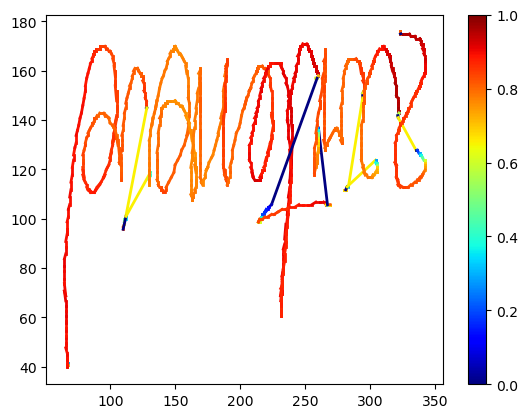

In [11]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot(coord1[i:i+2,0], coord1[i:i+2,1], linewidth=2, c=c)
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)

#### Calculating the mean and the std of the pressure of one signature:

In [12]:
mu = np.mean(prs1)
std = np.std(prs1)
print ('mean: %.2f; std: %.2f' % (mu, std))

mean: 210.83; std: 33.41


#### Plotting the normal distribution:

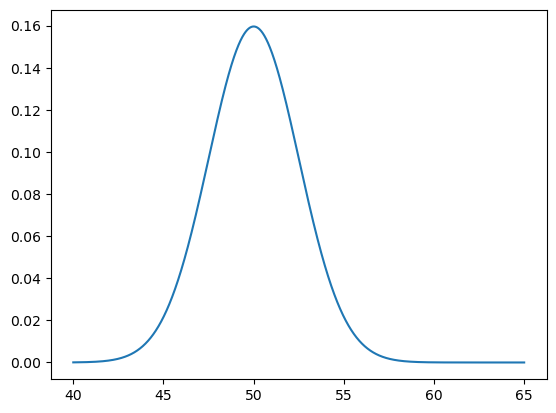

In [65]:
x = np.arange(40, 65, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

-    ##### This if statement is necessary because some points are recorded as being at the same time value. When calculating the velocity if two points are at the same time value the time diff will be 0. When this happens the formula of distance/time will not work as distance will be divided by 0. So the if statement corrects this case to instead have a very small time diff.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

In [14]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [47]:

data_dir = '../lab2/signature_samples/biometrics/genuine/'

# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    

0.22787206432353943 0.0051941397954260666


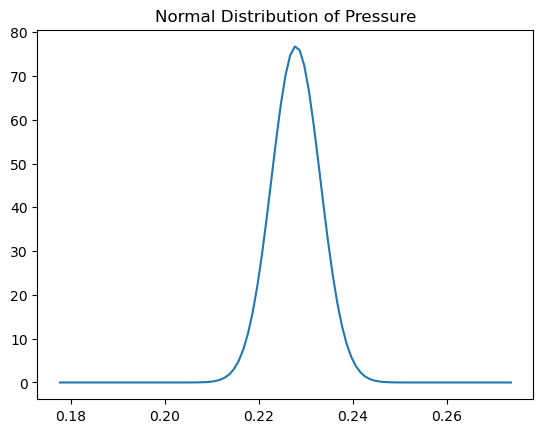

In [62]:
mu_prs = np.mean(stats_measures[:,2])
std_prs = np.std(stats_measures[:,3])
print(mu_prs, std_prs)

x = np.arange(min(stats_measures[:,2])+0.005,max(stats_measures[:,2])-0.01, 0.001)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)


plt.title('Normal Distribution of Pressure')
plt.plot(x, x_pdf);

15.378001166639681 10.195875461031227


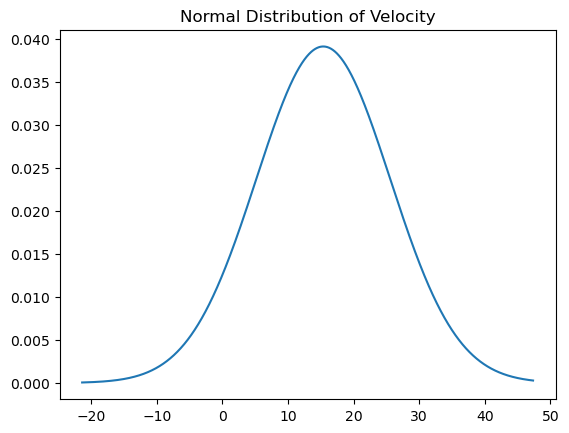

In [57]:
mu_prs = np.mean(stats_measures[:,0])
std_prs = np.std(stats_measures[:,1])
print(mu_prs, std_prs)

x = np.arange(min(stats_measures[:,0])-25,max(stats_measures[:,0])+25, 0.001)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)
plt.title('Normal Distribution of Velocity')
plt.plot(x, x_pdf);

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [51]:
data_dir = '../lab2/signature_samples/biometrics/impostor/'

# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures2 = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord2 = csv_file[['X', 'Y']].to_numpy()
    time2 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs2 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time2, coord2)
    
    stats_measures2[i, 0] = np.mean(vel)
    stats_measures2[i, 1] = np.std(vel)
    
    stats_measures2[i, 2] = np.mean(prs2)
    stats_measures2[i, 3] = np.std(prs2)

0.5566357631298406 0.012970117184538006


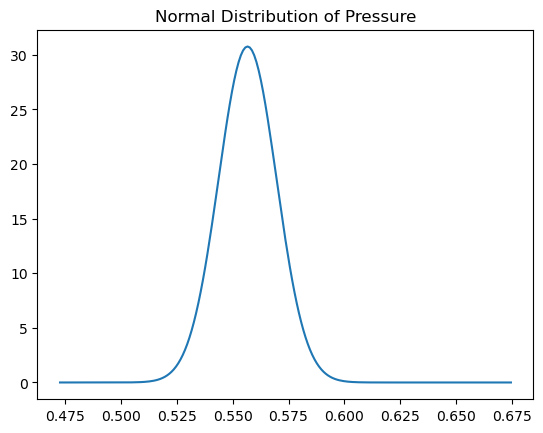

In [52]:
mu_prs = np.mean(stats_measures2[:,2])
std_prs = np.std(stats_measures2[:,3])
print(mu_prs, std_prs)

x = np.arange(min(stats_measures2[:,2]),max(stats_measures2[:,2]), 0.001)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)
plt.title('Normal Distribution of Pressure')
plt.plot(x, x_pdf);

13.4721991642634 6.311358058826857


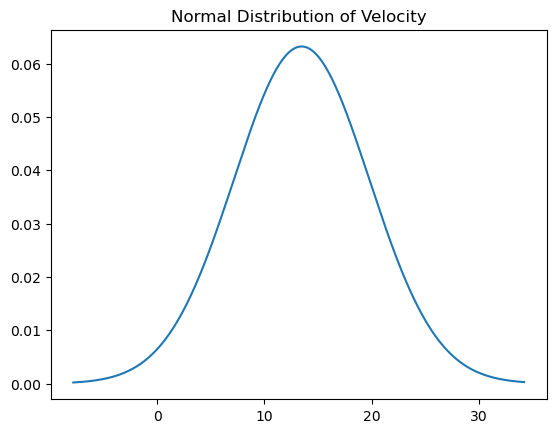

In [54]:
mu_prs = np.mean(stats_measures2[:,0])
std_prs = np.std(stats_measures2[:,1])
print(mu_prs, std_prs)

x = np.arange(min(stats_measures2[:,0])-15,max(stats_measures2[:,0])+15, 0.001)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)
plt.title('Normal Distribution of Velocity')
plt.plot(x, x_pdf);

#### We did observe a significant difference between the graphs from exercise 4 and exercise 5.  The peaks for pressure had a difference of 0.23 and the peaks for velocity had a difference of 1.9.

### Conclusion: In this lab, we were taught how to analyze and compare data collection methods. We also learned about the differences between genuine and fake biometrics, specifically focusing on signature comparison. Through this exercise, we gained a deeper understanding of the various techniques used to authenticate biometric data and the importance of being able to distinguish between real and fake data. Additionally, we were able to apply these concepts and techniques to real-world scenarios, further solidifying our understanding and knowledge in this field.
